In [1]:
import os
from matplotlib import pyplot as plt
import cv2 as cv

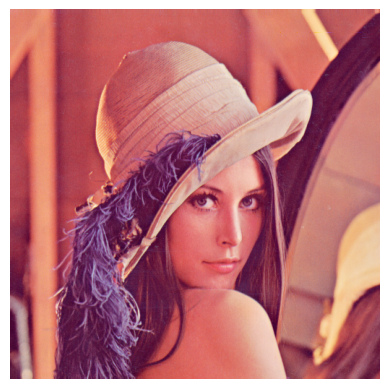

In [2]:
image_path = os.path.join(os.pardir, os.pardir, os.pardir, 'img', 'segmentation', 'Lenna.png')
lenna_image = cv.imread(image_path, cv.IMREAD_COLOR)
lenna_image = cv.cvtColor(lenna_image, cv.COLOR_BGR2RGB)
plt.imshow(lenna_image)
plt.axis('off')
plt.show()

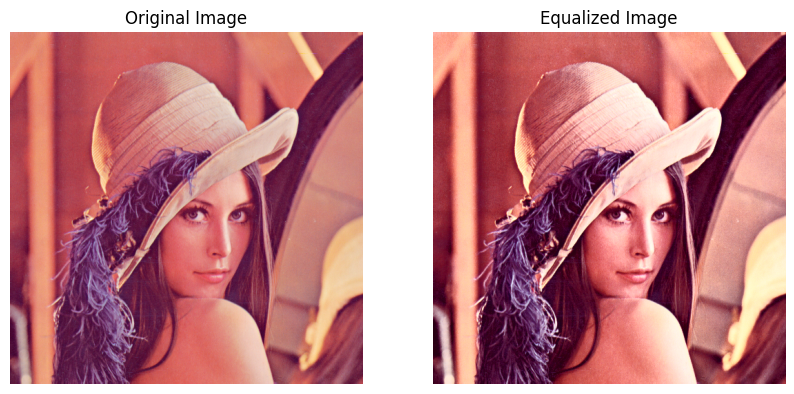

In [3]:
lenna_image_yuv = cv.cvtColor(lenna_image, cv.COLOR_RGB2YUV)
lenna_image_yuv[:,:,0] = cv.equalizeHist(lenna_image_yuv[:,:,0])
lenna_image_yuv = cv.cvtColor(lenna_image_yuv, cv.COLOR_YUV2RGB)

# Show before and after equalization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(lenna_image)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(lenna_image_yuv)
ax[1].axis('off')
ax[1].set_title('Equalized Image')
plt.show()

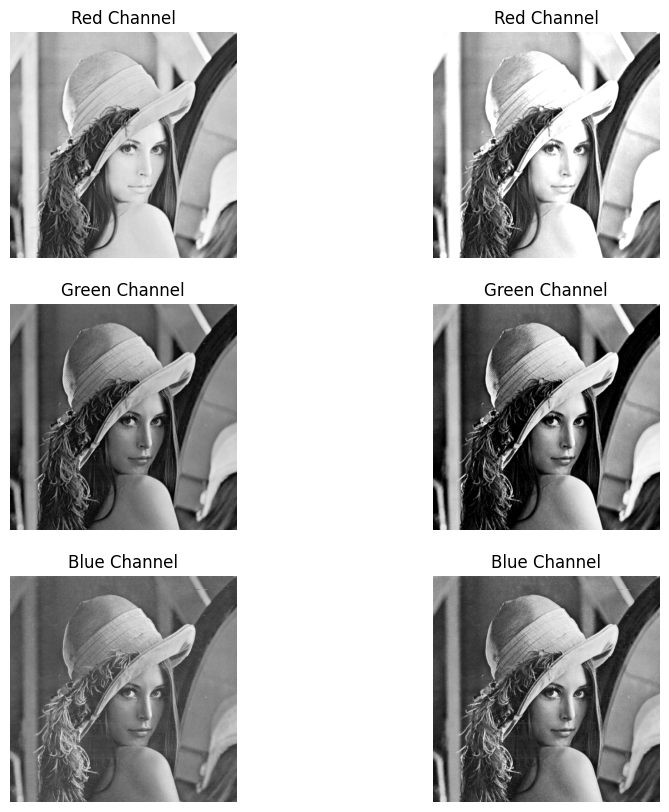

In [4]:
# Plot each channel of the original and equalized images
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
for i in range(3):
    ax[i, 0].imshow(lenna_image[:,:,i], cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(['Red Channel', 'Green Channel', 'Blue Channel'][i])
    ax[i, 1].imshow(lenna_image_yuv[:,:,i], cmap='gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(['Red Channel', 'Green Channel', 'Blue Channel'][i])

As we can see from the images above, the equalized image has more contrast than the original image. This is because the equalization process spreads the pixel values out more evenly across the histogram, which makes the image look brighter and more vibrant. The equalized image also has more detail in the shadows and highlights, which makes it look more visually appealing.

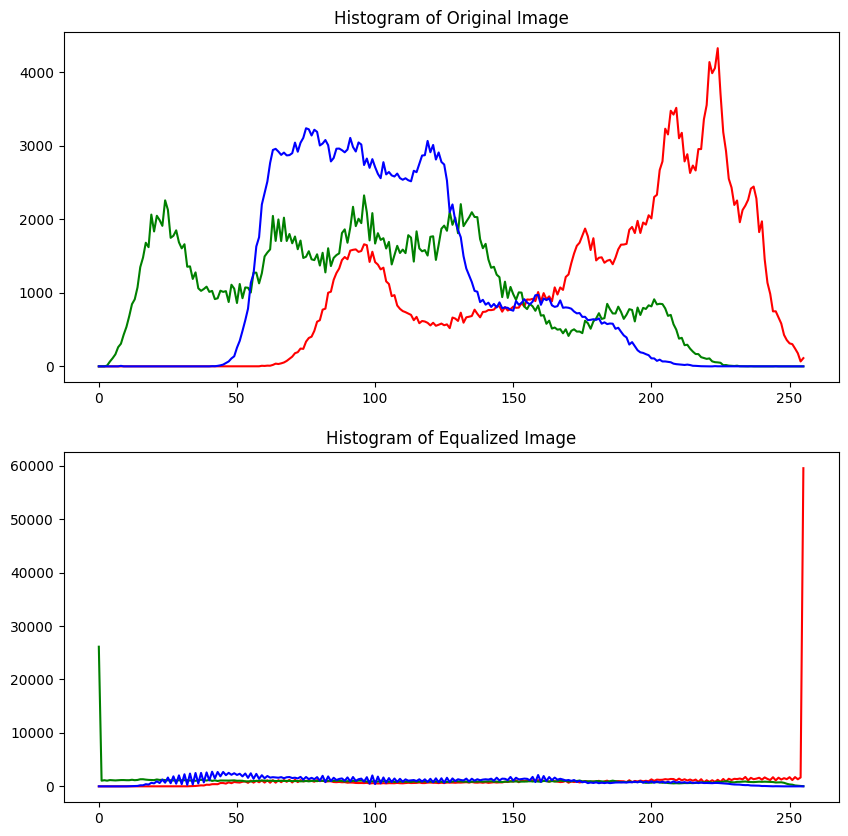

In [5]:
# Histograms of the original and equalized images for each channel as line plots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
for i in range(3):
    ax[0].plot(cv.calcHist([lenna_image], [i], None, [256], [0, 256]), color=['red', 'green', 'blue'][i])
    ax[1].plot(cv.calcHist([lenna_image_yuv], [i], None, [256], [0, 256]), color=['red', 'green', 'blue'][i])
ax[0].set_title('Histogram of Original Image')
ax[1].set_title('Histogram of Equalized Image')
plt.show()